In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Session

### Global Variable

In [2]:
a = tf.constant(0, name = 'a')
print(a)
b = tf.Variable(a + 1, name = 'b')
print(b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(a))
    print(sess.run(b))

Tensor("a:0", shape=(), dtype=int32)
<tf.Variable 'b:0' shape=() dtype=int32_ref>
0
1


In [3]:
a = tf.random_normal([3, 2])
print(a)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(a))

Tensor("random_normal:0", shape=(3, 2), dtype=float32)
[[ 1.7748526  -1.7363902 ]
 [ 0.7712964   2.491029  ]
 [ 0.94710344 -2.1358414 ]]


### Placeholder

In [4]:
width = tf.placeholder('int32')
print(width)
height = tf.placeholder('int32')
print(height)
area = tf.multiply(width, height)
print(area)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(area, feed_dict = {width: 6, height: 8}))

Tensor("Placeholder:0", dtype=int32)
Tensor("Placeholder_1:0", dtype=int32)
Tensor("Mul:0", dtype=int32)
48


# TensorBoard

In [5]:
width = tf.placeholder('int32', name = 'width')
height = tf.placeholder('int32', name = 'height')
area = tf.multiply(width, height)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    sess.run(area, feed_dict = {width: 6, height: 8})
    tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('log/area', sess.graph)

tensorboard --logdir=~/Users/DannyShau/code/deep_learning/note/tensorflow/log/area

http://localhost:6006/

# Neural Network

### Relu

In [6]:
X = tf.Variable(np.random.randn(1, 3))
W = tf.Variable(np.random.randn(3, 2))
b = tf.Variable(np.random.randn(1, 2))
XWb = tf.matmul(X, W) + b
y = tf.nn.relu(XWb)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(XWb)
    print(sess.run(XWb))
    print(y)
    print(sess.run(y))

Tensor("add_1:0", shape=(1, 2), dtype=float64)
[[-0.53334811 -1.22658581]]
Tensor("Relu:0", shape=(1, 2), dtype=float64)
[[0. 0.]]


### Sigmoid

In [7]:
X = tf.Variable(np.random.randn(1, 3))
W = tf.Variable(np.random.randn(3, 2))
b = tf.Variable(np.random.randn(1, 2))
XWb = tf.matmul(X, W) + b
y = tf.nn.sigmoid(XWb)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(XWb)
    print(sess.run(XWb))
    print(y)
    print(sess.run(y))

Tensor("add_2:0", shape=(1, 2), dtype=float64)
[[-0.13309062  0.33351052]]
Tensor("Sigmoid:0", shape=(1, 2), dtype=float64)
[[0.46677637 0.5826133 ]]


### Placeholder

In [8]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([3, 2]))
X = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 3)
    (b, W, X, y) = sess.run((b, W, X, y), feed_dict = {X: X_array})
    print('b')
    print(b)
    print('W')
    print(W)
    print('X')
    print(X)
    print('y')
    print(y)

b
[[-0.64200103  0.38825387]
 [ 0.7008371   0.3196014 ]
 [ 0.23700236 -1.02441   ]]
W
[[ 0.71039873 -0.1364015 ]
 [-0.61814725 -1.9796659 ]
 [-0.995713   -0.7551894 ]]
X
[[-0.27892548 -0.21095058  1.0711106 ]]
y
[[0.         0.03501996]
 [0.         0.        ]
 [0.         0.        ]]


In [13]:
def layer(output_dim, input_dim, inputs, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))    
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

X = tf.placeholder('float', [None, 4])
h = layer(output_dim = 3, input_dim = 4, inputs = X, activation = tf.nn.relu)
y = layer(output_dim = 2, input_dim = 3, inputs = h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 4)
    (layer_X, layer_h, layer_y) = sess.run((X, h, y), feed_dict = {X: X_array})
    print('X_array')
    print(X_array)
    print('layer_h')
    print(layer_h)
    print('layer_y')
    print(layer_y)

X_array
[[ 2.40718195  0.67956491  1.4348637  -2.56378541]]
layer_h
[[3.8515115 5.745198  0.       ]]
layer_y
[[ 8.717981  -5.9410048]]


In [14]:
def layer_debug(output_dim, input_dim, inputs, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))    
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs, W, b

X = tf.placeholder('float', [None, 4])
h, W1, b1 = layer_debug(output_dim = 3, input_dim = 4, inputs = X, activation = tf.nn.relu)
y, W2, b2 = layer_debug(output_dim = 2, input_dim = 3, inputs = h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 4)
    (layer_X, layer_h, layer_y, W1, b1, W2, b2) = sess.run((X, h, y, W1, b1, W2, b2), feed_dict = {X: X_array})
    print('X_array')
    print(X_array)
    print('layer_h')
    print(layer_h)
    print('W1')
    print(W1)
    print('b1')
    print(b1)    
    print('layer_y')
    print(layer_y)
    print('W2')
    print(W2)
    print('b2')
    print(b2)        

X_array
[[-0.26534729 -1.07743693  1.25600407 -0.29061099]]
layer_h
[[1.2844096  0.06257927 0.        ]]
W1
[[ 1.891141   -0.6189127   0.1082385 ]
 [ 0.04591727  0.6832555   1.508469  ]
 [-0.7913293  -0.01021314 -1.2857357 ]
 [-0.7331679   0.78812605  0.8089355 ]]
b1
[[ 2.616538   0.876383  -0.3204355]]
layer_y
[[-0.01055008  2.0868862 ]]
W2
[[-0.42642143  0.38399664]
 [-0.41491768  0.34200278]
 [-0.29336724  0.9564916 ]]
b2
[[0.563115  1.5722749]]


# Normal Distribution

### numpy

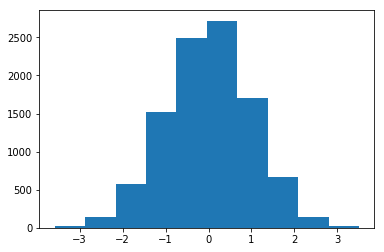

In [9]:
np_normal_data = np.random.randn(10000)
plt.hist(np_normal_data)
plt.show()

### TensorFlow

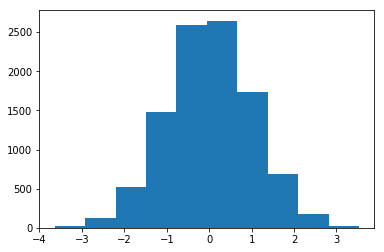

In [10]:
tf_normal = tf.random_normal([10000])
with tf.Session() as session:
    tf_normal_data = tf_normal.eval()
plt.hist(tf_normal_data)
plt.show()